In [41]:
import pandas as pd
data = pd.read_csv('Synthetic_Financial_datasets_log.csv')
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [42]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [45]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [46]:
print(data.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [47]:
#phase1-2
columns_to_drop = ['newbalanceOrig', 'newbalanceDest']

data_cleaned = data.drop(columns=columns_to_drop)

print("Columns kept for further analysis:")
print(data_cleaned.columns)



Columns kept for further analysis:
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'nameDest',
       'oldbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [48]:
#phase2-1
total = len(data)
print('total number of transaction:', total)
print("\nTotal number of transactions by type:")
tran_num = data['type'].value_counts()
print(tran_num)

total number of transaction: 6362620

Total number of transactions by type:
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [49]:
#phase2-2
fraud_percent = data['isFraud'].mean() * 100
print(f"Fraudulent transactions: {fraud_percent:.2f}%")

print(data.groupby('type')['isFraud'].mean() * 100)



Fraudulent transactions: 0.13%
type
CASH_IN     0.000000
CASH_OUT    0.183955
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.768799
Name: isFraud, dtype: float64


In [51]:
#phase2-3
fraud_stats = data[data['isFraud'] == 1]['amount'].describe()
nonfraud_stats = data[data['isFraud'] == 0]['amount'].describe()
print("Fraud Amount Stats:\n", fraud_stats)
print()
print("Non-Fraud Amount Stats:\n", nonfraud_stats)

Fraud Amount Stats:
 count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

Non-Fraud Amount Stats:
 count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64


In [52]:
#phase3-1:
data['isFlaggedFraud'] = data['amount'] > 200000

print(data[data['isFraud'] == 1].groupby('type').size())
print(data[data['isFraud'] == 1]['step'].value_counts().head())


type
CASH_OUT    4116
TRANSFER    4097
dtype: int64
step
212    40
523    30
387    28
425    28
249    28
Name: count, dtype: int64


In [53]:
#phase3-2
print(data.groupby('type')['amount'].agg(['count', 'sum']))

print()

fraud_accounts = data[data['isFraud'] == 1]
print(fraud_accounts['nameOrig'].value_counts().head())
print(fraud_accounts['nameDest'].value_counts().head())


            count           sum
type                           
CASH_IN   1399284  2.363674e+11
CASH_OUT  2237500  3.944130e+11
DEBIT       41432  2.271992e+08
PAYMENT   2151495  2.809337e+10
TRANSFER   532909  4.852920e+11

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
Name: count, dtype: int64
nameDest
C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
Name: count, dtype: int64


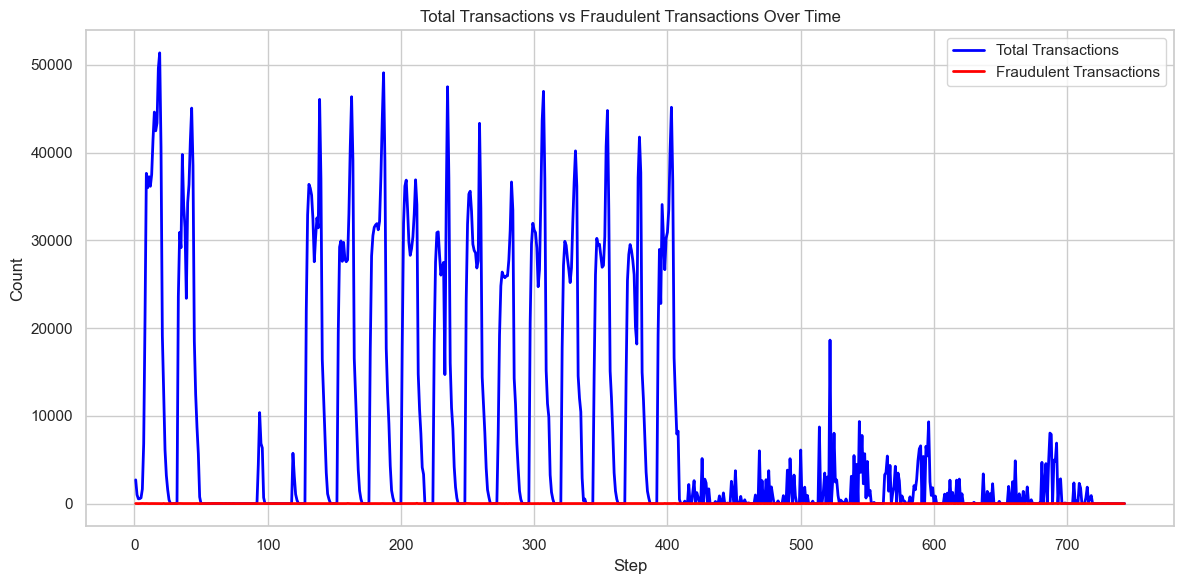

In [70]:
import pandas as pd
import matplotlib.pyplot as plt


total = data.groupby('step').size()  # Total transactions per step
fraud = data[data['isFraud'] == 1].groupby('step').size()  # Fraudulent transactions per step
plt.figure(figsize=(12, 6))


plt.plot(total.index, total, label='Total Transactions', color='blue', linewidth=2)
plt.plot(fraud.index, fraud, label='Fraudulent Transactions', color='red', linewidth=2)
plt.title('Total Transactions vs Fraudulent Transactions Over Time')
plt.xlabel('Step')
plt.ylabel('Count')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


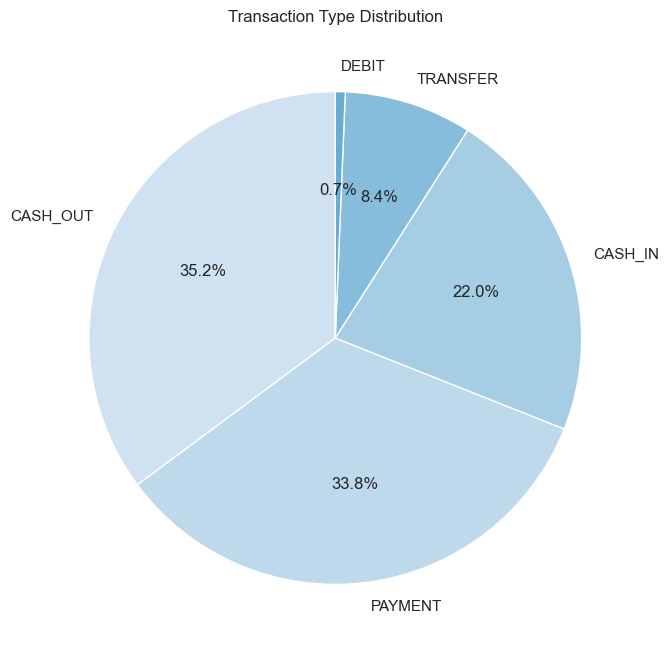

In [72]:
colors = plt.cm.Blues(range(50, 50 + len(data['type'].value_counts()) * 20, 20))
plt.figure(figsize=(8, 8))
data['type'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Transaction Type Distribution')
plt.ylabel('')
plt.show()

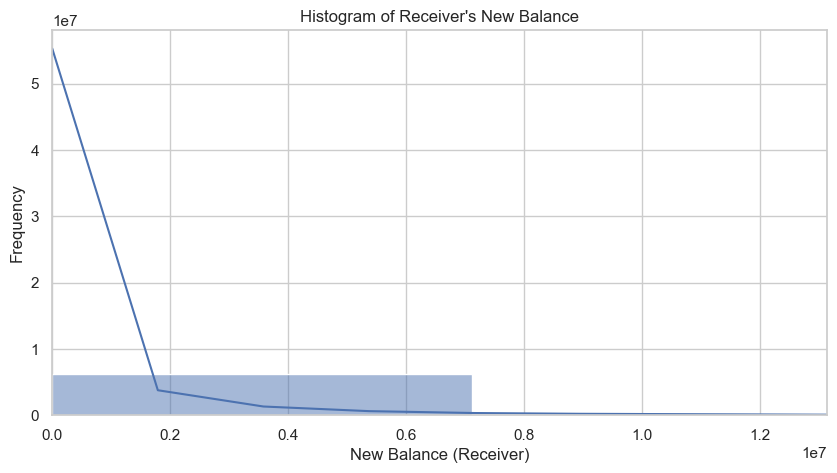

In [64]:
plt.figure(figsize=(10, 5))
sns.histplot(data['newbalanceDest'], bins=50, kde=True)
plt.title('Histogram of Receiver\'s New Balance')
plt.xlabel('New Balance (Receiver)')
plt.ylabel('Frequency')
plt.xlim(0, data['newbalanceDest'].quantile(0.99))
plt.show()


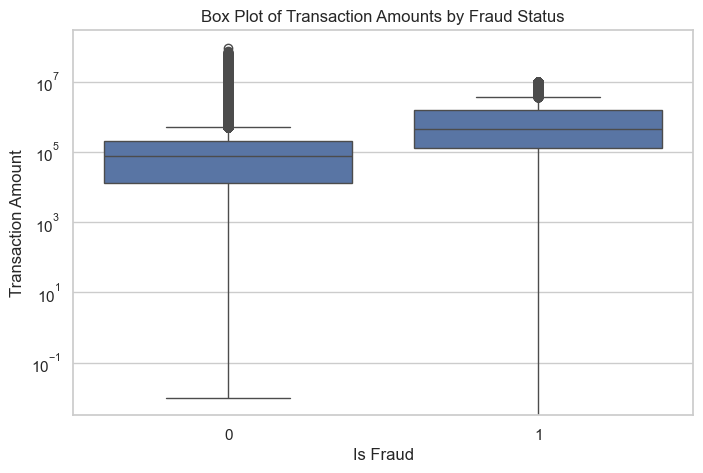

In [73]:
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title('Box Plot of Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.yscale('log') 
plt.show()

